In [1]:
from voicenet.datasets import stamerican
from voicenet.training import GMMModelTraining
from voicenet.feature_extraction import MFCC
import os
import numpy as np
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from scipy import stats

Invoking __init__.py for voicenet.feature_extraction
Invoking __init__.py for voicenet.models
Invoking __init__.py for voicenet.training
/home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/Voicenet-0.1.0-py3.7.egg/voicenet/datasets/download.py
/home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/Voicenet-0.1.0-py3.7.egg/voicenet/datasets
/home/ridhima/Documents/Github/Voicenet/notebooks
Invoking j __init__.py for voicenet.datasets


In [2]:
print(__file__)

NameError: name '__file__' is not defined

In [3]:
print(os.getcwd())

/home/ridhima/Documents/Github/Voicenet/notebooks


In [4]:
import sys
print(sys.path)

['/home/ridhima/Documents/Github/Voicenet/notebooks', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages', '/home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/Voicenet-0.1.0-py3.7.egg', '/home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/IPython/extensions', '/home/ridhima/.ipython']


In [3]:
!pwd

/home/ridhima/Documents/Github/Voicenet/notebooks


In [2]:
# stamerican(direc='./data/raw')

(x_train, y_train), (x_test, y_test) = stamerican()

print(y_test)

/home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/Voicenet-0.1.0-py3.7.egg/data/datasets
/home/ridhima/Documents/Github/Voicenet/data/datasets
ST-AEDS-20180100_1-OS.tgz already downloaded
f0001
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
f0002
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
f0003
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
f0004
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
f0005
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [], 'f0005': [], 'm0001': [], 'm0002': [], 'm0003': [], 'm0004': [], 'm0005': []}
[]
m0001
0
0
{'f0001': [], 'f0002': [], 'f0003': [], 'f0004': [

## FLATTEN FEATURES

In [28]:
def flatten_features_mfcc(files_list):
        
        """ Create features for all '.wav' files contains in files_list
        
        Arguments:
            files_list: takes a list of '.wav' training files

        Returns:
            features: creates a vector of all .wav training files and stack them over as an array
        """
        
        features = np.asarray(())
        
        for file in files_list:
            
#             logging.info("Creating features for {0}".format(file))
            
            # mfccfeatures = mfcc_features()
            vector = MFCC(file)
            
#             print(vector.shape)
            
            vector1 = np.dot(np.transpose(vector),vector)
            
#             print(vector1.shape)
            
            ## If features array is empty then stacking is not possible.
            if features.size == 0:
                ## Each features will be flatten of 39*39 => 1521
                features = vector1.flatten()
                
            else:
                features = np.vstack((features, vector1.flatten()))
                
        return features

In [29]:
X_train = flatten_features_mfcc(x_train)

In [30]:
X_train.shape

(2557, 1521)

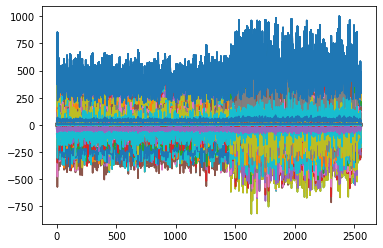

In [31]:
plt.plot(X_train)
plt.show()

In [8]:
np.array(y_train).shape

(2557,)

## Vanilla NN

In [32]:
np.random.seed(1137)

In [33]:
model = models.Sequential()
# model.add(layers.Dense(512, activation='relu', )
# model.add(layers.Dense(512, activation='relu', input_shape =(X_train.shape[1],)))
# model.add(BatchNormalization())
# model.add(Dropout(0.50))
model.add(layers.Dense(256, activation='relu', input_shape =(X_train.shape[1],)))
# model.add(layers.Dense(256, activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization())
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [35]:
history  = model.fit(X_train,np.array(np.array(y_train).reshape((len(y_train),1))), epochs=200, batch_size=64, validation_split=0.2)

Epoch 1/200
32/32 [==============================] - 0s 9ms/step - loss: 0.2182 - accuracy: 0.9291 - val_loss: 1.8003e-04 - val_accuracy: 1.0000
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0498 - accuracy: 0.9946 - val_loss: 2.6751e-04 - val_accuracy: 1.0000
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0314 - accuracy: 0.9966 - val_loss: 5.7458e-04 - val_accuracy: 1.0000
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9985 - val_loss: 5.3246e-04 - val_accuracy: 1.0000
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0172 - accuracy: 0.9971 - val_loss: 5.9795e-04 - val_accuracy: 1.0000
Epoch 6/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0103 - accuracy: 0.9985 - val_loss: 6.0717e-04 - val_accuracy: 1.0000
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.9990 - val_loss: 5.4643e-04 - val_ac

32/32 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.0239 - val_accuracy: 0.9980
Epoch 59/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0280 - val_accuracy: 0.9980
Epoch 60/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0293 - val_accuracy: 0.9980
Epoch 61/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0402 - val_accuracy: 0.9961
Epoch 62/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0378 - val_accuracy: 0.9980
Epoch 63/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0394 - val_accuracy: 0.9902
Epoch 64/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0286 - val_accuracy: 0.9980
Epoch 65/200
32/32 

32/32 [==============================] - 0s 6ms/step - loss: 3.7141e-04 - accuracy: 1.0000 - val_loss: 3.9190e-04 - val_accuracy: 1.0000
Epoch 115/200
32/32 [==============================] - 0s 6ms/step - loss: 2.6282e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9980
Epoch 116/200
32/32 [==============================] - 0s 6ms/step - loss: 2.4312e-04 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9980
Epoch 117/200
32/32 [==============================] - 0s 6ms/step - loss: 2.2325e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 118/200
32/32 [==============================] - 0s 8ms/step - loss: 3.6119e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9980
Epoch 119/200
32/32 [==============================] - 0s 6ms/step - loss: 7.6432e-04 - accuracy: 0.9995 - val_loss: 7.5168e-04 - val_accuracy: 1.0000
Epoch 120/200
32/32 [==============================] - 0s 6ms/step - loss: 4.5477e-04 - accuracy: 1.0000 - val_loss: 0.0087 

32/32 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.0073 - val_accuracy: 0.9980
Epoch 171/200
32/32 [==============================] - 0s 6ms/step - loss: 9.9193e-04 - accuracy: 0.9995 - val_loss: 0.0085 - val_accuracy: 0.9980
Epoch 172/200
32/32 [==============================] - 0s 6ms/step - loss: 2.0333e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9980
Epoch 173/200
32/32 [==============================] - 0s 6ms/step - loss: 3.6702e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9980
Epoch 174/200
32/32 [==============================] - 0s 6ms/step - loss: 4.9352e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9980
Epoch 175/200
32/32 [==============================] - 0s 6ms/step - loss: 1.9087e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9980
Epoch 176/200
32/32 [==============================] - 0s 6ms/step - loss: 1.9183e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accura

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


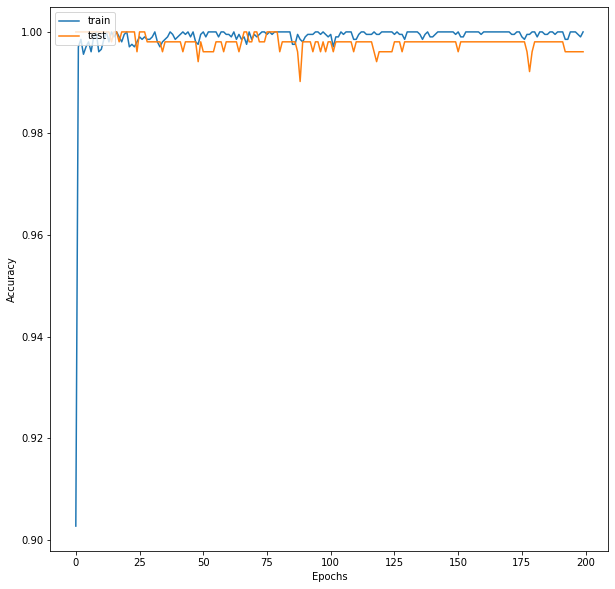

In [12]:
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## 1D ConvNet 

In [13]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv1D(128, (3), activation='relu', input_shape=(X_train.shape[1],1)))
cnn_model.add(Dropout(0.15))
cnn_model.add(layers.MaxPool1D(2))
cnn_model.add(layers.Conv1D(64, (3), activation='relu'))
cnn_model.add(Dropout(0.15))
cnn_model.add(layers.MaxPool1D(2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(Dropout(0.15))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
cnn_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [15]:
history  = cnn_model.fit(X_train,np.array(np.array(y_train).reshape((len(y_train),1))), epochs=100, validation_split=0.2)

Epoch 1/100


ValueError: in user code:

    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 1521]


## Z-SCore and GRAM Matrix Features 

In [16]:
def zscore_gram_matrix(files_list):
        
        """ Create features for all '.wav' files contains in files_list
        
        Arguments:
            files_list: takes a list of '.wav' training files

        Returns:
            features: creates a vector of all .wav training files and stack them over as an array
        """
        
        features = list()
        
        for file in files_list:
            
#             logging.info("Creating features for {0}".format(file))
            
            # mfccfeatures = mfcc_features()
            vector = MFCC(file)
            vector = stats.zscore(vector, axis=1, ddof=1)
            
#             print(vector.shape)
            
            vector1 = np.dot(np.transpose(vector),vector)
        
            features.append(np.array(vector1))
            
#             print(vector1.shape)
            
            ## If features array is empty then stacking is not possible.
#             if features.size == 0:
#                 features = vector1.flatten()
                
#             else:
#                 features = np.vstack((features, vector1.flatten()))
                
        return np.array(features)

In [17]:
X_train = zscore_gram_matrix(x_train)

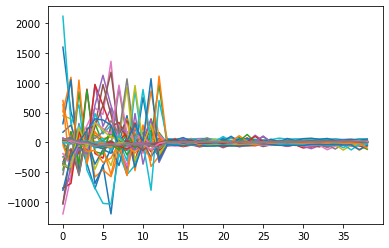

In [67]:
plt.plot(X_train[1])
plt.plot(X_train[2])
plt.show()

In [18]:
# X_train = np.array(X_train)[indices.astype(int)]
print(type(X_train))
print(X_train[0])
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

<class 'numpy.ndarray'>
[[ 2.06327489e+03  7.56978825e+02 -7.29271928e+01 ...  4.56762291e+00
   3.77279795e+00  3.66732413e+00]
 [ 7.56978825e+02  1.35733581e+03 -3.60017058e+02 ...  3.79838401e+01
   4.43780573e+01  4.42390951e+01]
 [-7.29271928e+01 -3.60017058e+02  1.00101318e+03 ... -1.06678050e+01
  -6.76223287e+00  1.21822293e+00]
 ...
 [ 4.56762291e+00  3.79838401e+01 -1.06678050e+01 ...  3.58755747e+01
   1.30190108e+01  1.55445531e+01]
 [ 3.77279795e+00  4.43780573e+01 -6.76223287e+00 ...  1.30190108e+01
   2.44189340e+01  1.39717844e+01]
 [ 3.66732413e+00  4.42390951e+01  1.21822293e+00 ...  1.55445531e+01
   1.39717844e+01  3.45241712e+01]]
(2557, 39, 39)


## 2D CNN Model 

In [19]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))
cnn_model.add(Dropout(0.15))
cnn_model.add(layers.MaxPool2D(2,2))
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(Dropout(0.15))
cnn_model.add(layers.MaxPool2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(Dropout(0.15))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
cnn_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [21]:
history  = cnn_model.fit(X_train,np.array(np.array(y_train).reshape((len(y_train),1))), epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 5s 83ms/step - loss: 2.9721 - accuracy: 0.6929 - val_loss: 0.7117 - val_accuracy: 0.0000e+00
Epoch 2/100
64/64 [==============================] - 5s 81ms/step - loss: 0.6805 - accuracy: 0.7115 - val_loss: 0.7384 - val_accuracy: 0.0000e+00
Epoch 3/100
64/64 [==============================] - 5s 80ms/step - loss: 0.6706 - accuracy: 0.7115 - val_loss: 0.7662 - val_accuracy: 0.0000e+00
Epoch 4/100
64/64 [==============================] - 5s 80ms/step - loss: 0.6615 - accuracy: 0.7115 - val_loss: 0.7937 - val_accuracy: 0.0000e+00
Epoch 5/100
64/64 [==============================] - 6s 98ms/step - loss: 0.6533 - accuracy: 0.7115 - val_loss: 0.8207 - val_accuracy: 0.0000e+00
Epoch 6/100
64/64 [==============================] - 6s 95ms/step - loss: 0.6460 - accuracy: 0.7115 - val_loss: 0.8473 - val_accuracy: 0.0000e+00
Epoch 7/100
64/64 [==============================] - 6s 96ms/step - loss: 0.6396 - accuracy: 0.7115 - val_loss: 0.8731 - val

Epoch 57/100
64/64 [==============================] - 5s 78ms/step - loss: 0.6008 - accuracy: 0.7115 - val_loss: 1.2411 - val_accuracy: 0.0000e+00
Epoch 58/100
64/64 [==============================] - 5s 78ms/step - loss: 0.6008 - accuracy: 0.7115 - val_loss: 1.2430 - val_accuracy: 0.0000e+00
Epoch 59/100
64/64 [==============================] - 5s 78ms/step - loss: 0.6009 - accuracy: 0.7115 - val_loss: 1.2403 - val_accuracy: 0.0000e+00
Epoch 60/100
64/64 [==============================] - 5s 82ms/step - loss: 0.6008 - accuracy: 0.7115 - val_loss: 1.2408 - val_accuracy: 0.0000e+00
Epoch 61/100
64/64 [==============================] - 5s 79ms/step - loss: 0.6009 - accuracy: 0.7115 - val_loss: 1.2423 - val_accuracy: 0.0000e+00
Epoch 62/100
64/64 [==============================] - 5s 82ms/step - loss: 0.6009 - accuracy: 0.7115 - val_loss: 1.2413 - val_accuracy: 0.0000e+00
Epoch 63/100
64/64 [==============================] - 5s 81ms/step - loss: 0.6009 - accuracy: 0.7115 - val_loss: 1.245

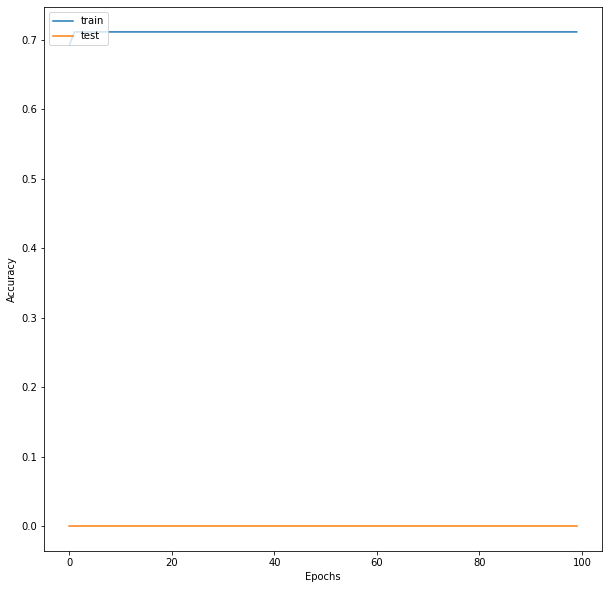

In [22]:
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [23]:
X_test = zscore_gram_matrix(x_test)

In [73]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
cnn_model.predict(X_test[0])

ValueError: in user code:

    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /home/ridhima/Documents/Github/Voicenet/voicenet_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [None, 39, 1]


In [75]:
cnn_model.evaluate(X_test, np.array(np.array(y_test).reshape((len(y_test),1))))

41/41 [==============================] - 1s 14ms/step - loss: 0.0186 - accuracy: 0.9969


[0.018633203580975533, 0.9968871474266052]

In [62]:
## Testing snippets

In [37]:
x = np.array([2,1,1])
print(x)
print(x.shape)
x = x.reshape(3,1)
print(x)
print(x.shape)

[2 1 1]
(3,)
[[2]
 [1]
 [1]]
(3, 1)


In [15]:
np.array(np.array(y_train).reshape((len(y_train),1))).shape

(2557, 1)

In [19]:
2557/128

19.9765625

In [17]:
np.array(np.array(y_train).reshape((len(y_train),1)))

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])